# CIVE 7100 | Final Project | August Posch | April 2022  

### Question 1 Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import geopandas as gpd

In [3]:
rides = pd.read_csv('data/L_Station_Daily_Totals.csv')

stops = pd.read_csv('data/List_of_L_Stops.csv')

stations = gpd.read_file('data/LStationShape')

## Now I have
- rides (pandas df)
- stations (geopandas gdf)

I don't need the stops dataset, and it might be hard to join in anyway - the stops dataset doesn't include station ID.

I will join Lrides and Lstations on station ID... But, I will hold off on that until I actually need to do it.

In [4]:
rides.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088958 entries, 0 to 1088957
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1088958 non-null  int64 
 1   stationname  1088958 non-null  object
 2   date         1088958 non-null  object
 3   daytype      1088958 non-null  object
 4   rides        1088958 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 41.5+ MB


In [6]:
# convert date column to datetime datatype

rides['date'] = pd.to_datetime(rides['date'])

In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088958 entries, 0 to 1088957
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   station_id   1088958 non-null  int64         
 1   stationname  1088958 non-null  object        
 2   date         1088958 non-null  datetime64[ns]
 3   daytype      1088958 non-null  object        
 4   rides        1088958 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 41.5+ MB


In [8]:
rides.groupby('station_id').min().sort_values('date').tail(20)  #grand opening dates

,stationname,date,daytype,rides
station_id,,,,
40400,Noyes,2001-01-01,A,0
40420,Cicero-Cermak,2001-01-01,A,0
40430,Clinton-Forest Park,2001-01-01,A,0
40550,Irving Park-O'Hare,2001-01-01,A,0
40450,95th/Dan Ryan,2001-01-01,A,0
40460,Merchandise Mart,2001-01-01,A,0
40440,California-Cermak,2001-01-01,A,0
40480,Cicero-Lake,2001-01-01,A,153
40490,Grand/Milwaukee,2001-01-01,A,0


It appears the following stations opened up within the last 10 years:

41680	Oakton-Skokie	2012-04-01	A	0  
41510	Morgan-Lake	2012-05-01	A	0  
41690	Cermak-McCormick Place	2015-01-01	A	0  
41700	Washington/Wabash	2017-08-01	A	0

In [9]:
rides.groupby('station_id').max().sort_values('date').head(20)  # station closure dates

,stationname,date,daytype,rides
station_id,,,,
41580,Homan,2001-07-31,W,27
40500,Washington/State,2009-01-31,W,12442
40640,Madison/Wabash,2018-01-01,W,12519
40200,Randolph/Wabash,2019-01-31,W,19181
41130,Halsted-Orange,2021-11-30,W,6763
41090,Monroe/State,2021-11-30,W,17702
41080,47th-South Elevated,2021-11-30,W,2795
41070,Kedzie-Lake,2021-11-30,W,2281
41060,Ashland-Orange,2021-11-30,W,2283


The following stations appear to have closed in the last 20 years:

41580	Homan	07/31/2001	W	27  
40500	Washington/State	12/31/2008	W	12442  
40640	Madison/Wabash	12/31/2017	W	12519  
40200	Randolph/Wabash	12/31/2018	W	19181

In [10]:
station_id_exclusions = [40200,40640,40500,41580,41680,41510,41690,41700]

## Need to get the series in a time order

Create rides2

In [11]:
rides2 = rides.copy()

In [12]:
rides2.index = [pd.Index(rides2['station_id']), pd.DatetimeIndex(rides2['date'])]

In [13]:
rides2 = rides2.sort_index()

In [14]:
rides2.head()

station_id         stationname       date daytype  \
station_id date                                                            
40010      2001-01-01       40010  Austin-Forest Park 2001-01-01       U   
           2001-01-02       40010  Austin-Forest Park 2001-01-02       W   
           2001-01-03       40010  Austin-Forest Park 2001-01-03       W   
           2001-01-04       40010  Austin-Forest Park 2001-01-04       W   
           2001-01-05       40010  Austin-Forest Park 2001-01-05       W   

                       rides  
station_id date               
40010      2001-01-01    290  
           2001-01-02   1240  
           2001-01-03   1412  
           2001-01-04   1388  
           2001-01-05   1465

Naming conventions: I think Austin-Forest Park means Austin station on the Forest Park branch.

In [15]:
rides2.loc[40010] # this is our time series for the station Austin-Forest Park!

,station_id,stationname,date,daytype,rides
date,,,,,
2001-01-01,40010,Austin-Forest Park,2001-01-01,U,290
2001-01-02,40010,Austin-Forest Park,2001-01-02,W,1240
2001-01-03,40010,Austin-Forest Park,2001-01-03,W,1412
2001-01-04,40010,Austin-Forest Park,2001-01-04,W,1388
2001-01-05,40010,Austin-Forest Park,2001-01-05,W,1465
...,...,...,...,...,...
2021-11-26,40010,Austin-Forest Park,2021-11-26,W,350
2021-11-27,40010,Austin-Forest Park,2021-11-27,A,282
2021-11-28,40010,Austin-Forest Park,2021-11-28,U,239


### Create time series

In [16]:
rides2.loc[40010,'rides'] # this one is just the rides!

date
2001-01-01     290
2001-01-02    1240
2001-01-03    1412
2001-01-04    1388
2001-01-05    1465
              ... 
2021-11-26     350
2021-11-27     282
2021-11-28     239
2021-11-29     646
2021-11-30     676
Name: rides, Length: 7642, dtype: int64

In [17]:
# to deal with all the indexing, I recommend using two lines of code

smaller = rides2.loc[40010,'rides']

smaller['2017'] # gets down to the data we want

date
2017-01-01     553
2017-01-02     746
2017-01-03    1676
2017-01-04    1664
2017-01-05    1590
              ... 
2017-12-27    1074
2017-12-28    1155
2017-12-29    1153
2017-12-30     587
2017-12-31     511
Name: rides, Length: 365, dtype: int64

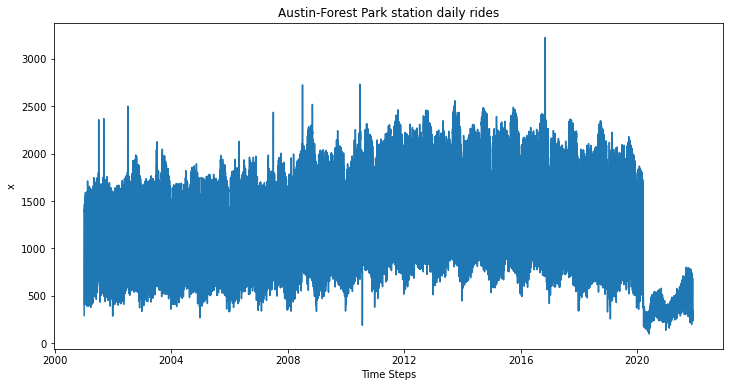

In [18]:
plt.figure(figsize=(12,6))
plt.title('Austin-Forest Park station daily rides')
plt.xlabel('Time Steps')
plt.ylabel('x')
plt.plot(rides2.loc[40010,'rides'])
plt.show()

### Plot a single year of a station

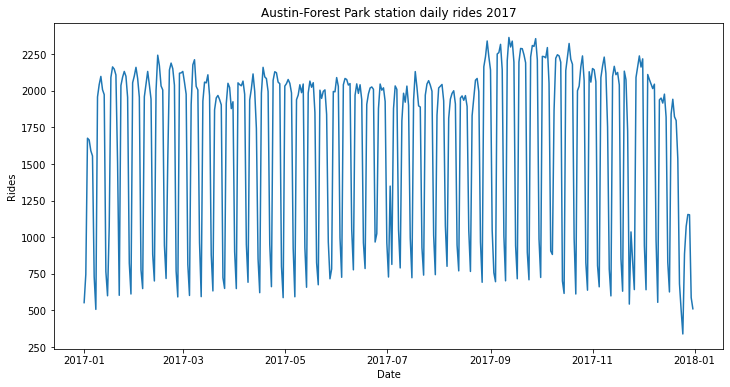

In [19]:
smaller = rides2.loc[40010,'rides']

plt.figure(figsize=(12,6))
plt.title('Austin-Forest Park station daily rides 2017')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(smaller['2017'])
plt.show()

In [20]:
stations.loc[stations['LONGNAME'].str.contains('Division') |
             stations['LONGNAME'].str.contains('Damen') |
             stations['LONGNAME'].str.contains('Western')]

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry
5,1480,Western-Ravenswood,Brown Line,4645 N. Western Avenue,1,0,1.159616e+06,1.930951e+06,41480,POINT (1159616.195 1930951.298)
7,90,Damen-Ravenswood,Brown Line,4643 N. Damen Avenue,1,0,1.162299e+06,1.931030e+06,40090,POINT (1162299.355 1931030.291)
13,590,Damen/Milwaukee,Blue Line,1558 N. Damen Avenue,0,0,1.162783e+06,1.910383e+06,40590,POINT (1162783.214 1910383.122)
29,670,Western/Milwaukee,Blue Line (O'Hare),1909 N. Western Avenue,1,0,1.160063e+06,1.912700e+06,40670,POINT (1160063.300 1912699.749)
58,740,Western-Douglas,Pink,2009 S. Western Avenue,1,0,1.160828e+06,1.890199e+06,40740,POINT (1160828.021 1890198.733)
69,220,Western-Congress,Blue Line (Congress),430 S. Western Avenue,0,0,1.159883e+06,1.897893e+06,40220,POINT (1159883.323 1897892.778)
108,310,Western-Midway,Orange Line,4901 S. Western Avenue,1,1,1.161268e+06,1.872086e+06,40310,POINT (1161268.486 1872085.727)
117,630,Clark/Division,Red Line,1200 N. Clark Street,1,0,1.175328e+06,1.908360e+06,40630,POINT (1175328.346 1908360.200)
123,320,Division/Milwaukee,Blue Line,1200 N. Milwaukee Avenue,0,0,1.165779e+06,1.908078e+06,40320,POINT (1165779.324 1908078.036)
135,210,Damen,Pink,2010 S. Damen Avenue,1,0,1.163335e+06,1.890261e+06,40210,POINT (1163335.476 1890260.805)


41480 Western on Brown  
40090 Damen on Brown  
40320 Division on Blue

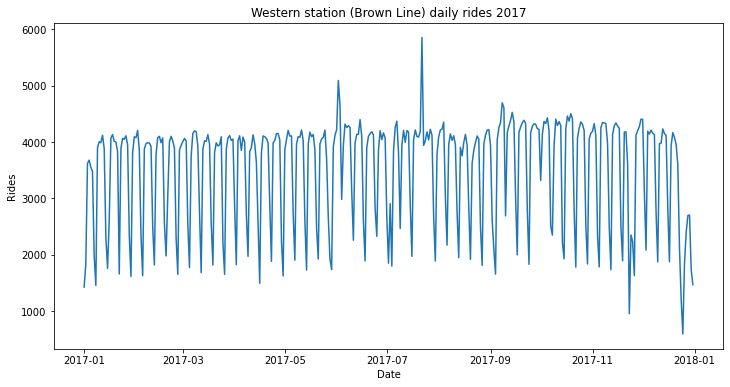

In [21]:
smaller = rides2.loc[41480,'rides']

plt.figure(figsize=(12,6))
plt.title('Western station (Brown Line) daily rides 2017')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(smaller['2017'])
plt.show()

Interesting: two of the weekends have *upticks* in usage!

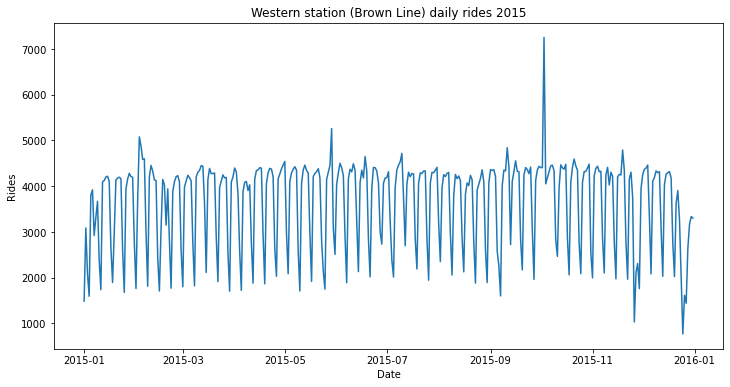

In [22]:
smaller = rides2.loc[41480,'rides']

plt.figure(figsize=(12,6))
plt.title('Western station (Brown Line) daily rides 2015')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(smaller['2015'])
plt.show()

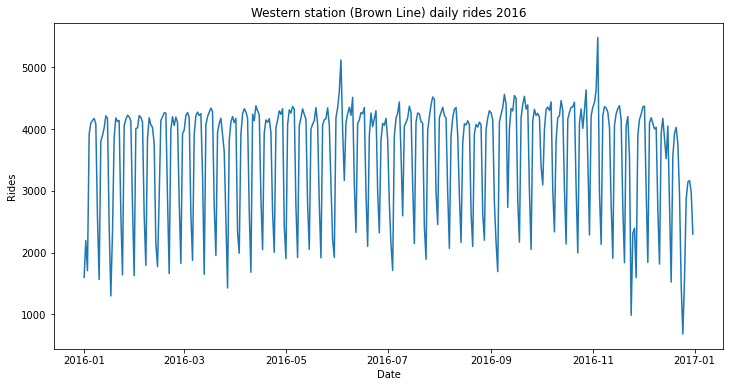

In [23]:
smaller = rides2.loc[41480,'rides']

plt.figure(figsize=(12,6))
plt.title('Western station (Brown Line) daily rides 2016')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(smaller['2016'])
plt.show()

### Analyze Western (Brown) statistics

We will analyze 2015-2017 to get these statistics.

In [25]:
ws01 = rides2.loc[41480,'rides'] # working series 01

lag1AC = np.corrcoef(ws01['2015-01-01':'2017-12-30'],ws01['2015-01-02':'2017-12-31'])[0,1] # note that time slices are inclusive

variance = np.var(ws01['2015':'2017'])

std = np.std(ws01['2015':'2017'])

mean = np.mean(ws01['2015':'2017'])

scaled_std = std/mean

### Analyze statistics for all stations

In [26]:
# create stations2 dataset - conatins only the stations we'll be studying

stations2 = stations.copy()

stations2 = stations2.loc[~stations2['GTFS'].isin(station_id_exclusions),:]

stations2.at[stations2['STATION_ID']==1400,'LINES'] = 'Red, Orange, Green' # fix description for Roosevelt/State

stations2.drop([95], axis=0, inplace=True) # drop unused station - Roosevelt/Wabash

stations2.at[stations2['STATION_ID']==1660,'GTFS'] = 41660 # correct GTFS for Lake/State

In [27]:
stations2.shape

(139, 10)

In [60]:
# create rides3 dataset - contains only the stations we'll be studying

rides3 = rides2.copy()

rides3 = rides3.loc[~rides3['station_id'].isin(station_id_exclusions),:]

In [29]:
rides3['station_id'].nunique()

139

In [30]:
set(rides3['station_id']) == set(stations2['GTFS'])

True

Woohoo! We have our datasets down to only the stations we want, and everything has the correct data. (as far as we know!)

In [59]:
# create stations3 which will contain our descriptive statistics

stations3 = stations2.copy()

In [35]:
# work with rides3 and stations3

In [55]:
# split rides3 into training set and validation set and testing set
# just need to identify which dates are training, which dates are val, and which dates are test

clay = rides3.index
clay = clay.droplevel(0).unique().to_series()
clay = clay.sort_values().loc['2015':'2019']

clay

date
2015-01-01   2015-01-01
2015-01-02   2015-01-02
2015-01-03   2015-01-03
2015-01-04   2015-01-04
2015-01-05   2015-01-05
                ...    
2019-12-27   2019-12-27
2019-12-28   2019-12-28
2019-12-29   2019-12-29
2019-12-30   2019-12-30
2019-12-31   2019-12-31
Name: date, Length: 1826, dtype: datetime64[ns]

Actually I don't think I should split up into test-val-train just yet, because then we would lose the contiguous lag-1-autocorrelation information. Regarding variance, std and mean, technically we would be fine to calculate those on a train set; however, the la-1-autocorrelation is still an issue.

I think it is acceptable to calculate these summary statistics on the whole dataset, because I'm not using these statistics as model inputs. I'm not even subconsciously using them to create a better model. I'm just using them to get a sense of which prediction problems (i.e. which stations) would be most interesting. When I actually do prediction, I'm going to start over and use 2-week or 5-week datasets to predict one day ahead.

All right. Good. Let's move forward now.

In [64]:
for station_id in stations3['GTFS']:  # iterate through 139 stations

    ws = rides3.loc[station_id,'rides'] # working series

    lag1AC = np.corrcoef(ws['2015-01-01':'2017-12-30'],ws['2015-01-02':'2017-12-31'])[0,1] # note that time slices are inclusive
    variance = np.var(ws['2015':'2017'])
    std = np.std(ws['2015':'2017'])
    mean = np.mean(ws['2015':'2017'])
    scaled_std = std/mean
    
    stations3.at[stations3['GTFS']==station_id,'lag1AC'] = lag1AC
    stations3.at[stations3['GTFS']==station_id,'variance'] = variance
    stations3.at[stations3['GTFS']==station_id,'std'] = std
    stations3.at[stations3['GTFS']==station_id,'mean'] = mean
    stations3.at[stations3['GTFS']==station_id,'scaled_std'] = scaled_std

In [65]:
stations3

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry,lag1AC,variance,std,mean,scaled_std
0,1120,35-Bronzeville-IIT,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,POINT (1177050.915 1882047.587),0.475323,2.858651e+05,534.663505,1632.043796,0.327604
1,760,Granville,Red Line,1119 W. Granville Avenue,1,0,1.167506e+06,1.941003e+06,40760,POINT (1167506.039 1941002.514),0.480697,6.787916e+05,823.888113,3723.973540,0.221239
2,1210,Wellington,"Brown, Purple (Express)",945 W. Wellington Avenue,1,0,1.169286e+06,1.920014e+06,41210,POINT (1169286.335 1920014.046),0.412306,9.169915e+05,957.596740,2536.816606,0.377480
3,140,Dempster-Skokie,Yellow Line,5001 W. Dempster Street,1,1,1.142190e+06,1.957320e+06,40140,POINT (1142189.799 1957320.432),0.753953,6.442909e+05,802.677358,1413.479927,0.567873
4,370,Washington/Dearborn,Blue Line,19 N. Dearborn,0,0,1.175927e+06,1.900801e+06,40370,POINT (1175927.284 1900801.153),0.376683,1.159049e+07,3404.480717,10366.215328,0.328421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,780,Central Park,Pink,1915 S. Central Park Avenue,1,0,1.152738e+06,1.889992e+06,40780,POINT (1152737.529 1889991.516),0.438591,8.879276e+04,297.981136,1068.583029,0.278856
137,150,Pulaski-Douglas,Pink,2005 S. Pulaski Road,1,0,1.150164e+06,1.889924e+06,40150,POINT (1150164.332 1889923.883),0.415879,7.213597e+04,268.581400,1023.253650,0.262478
138,600,Kostner,Pink,2019 S. Kostner Avenue,1,0,1.147730e+06,1.889868e+06,40600,POINT (1147729.864 1889868.063),0.397458,1.842789e+04,135.749381,451.789234,0.300471
139,420,Cicero-Douglas,Pink,2133 S. 48th Court,1,0,1.144444e+06,1.889180e+06,40420,POINT (1144443.844 1889179.921),0.388502,6.726837e+04,259.361473,1169.385036,0.221793


In [74]:
import contextily as cx

ModuleNotFoundError: No module named 'contextily'

In [77]:
stations3.crs

{'proj': 'tmerc',
 'lat_0': 36.66666666666666,
 'lon_0': -88.33333333333333,
 'k': 0.999975,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

NameError: name 'pyproj' is not defined

In [80]:
# come back to the above

In [85]:
# convert dataframe to the same coordinate system as the basemap
#df_wm = stations3.to_crs(epsg=3857)

df_wm = stations3

In [ ]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [88]:
columns = df_wm.columns[-5:]

columns[1]

'variance'

In [94]:
df_wm.iloc[:,-3]

0       534.663505
1       823.888113
2       957.596740
3       802.677358
4      3404.480717
          ...     
136     297.981136
137     268.581400
138     135.749381
139     259.361473
140     753.886784
Name: std, Length: 139, dtype: float64

At least get the subplots to work.

(no basemaps yet)

In [124]:
from matplotlib.patches import Rectangle

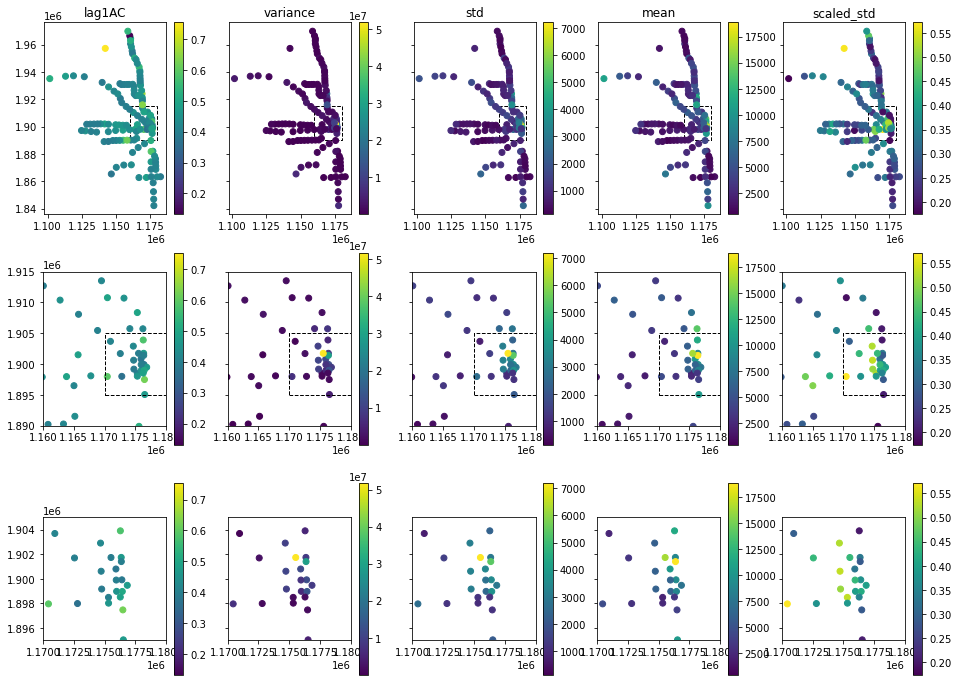

In [131]:
# Plotting summary statistics

rect1 = Rectangle((1160000,1890000), 20000, 25000, color='black', fc = 'none',lw = 2)
rect2 = Rectangle((1170000,1895000), 10000, 10000, color='black',fc = 'none', lw = 2)

fig, ax = plt.subplots(3, 5, figsize=(16,12), sharex='row', sharey='row')

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(3):
    for j in range(5):
        #ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
        
        # 'L train station rides:'
        if i==0:
            ax[i,j].title.set_text(columns[j])
            ax[i,j].add_patch(Rectangle((1160000,1890000), 20000, 25000, color='black', fc = 'none',lw = 1, ls='--'))
        
        df_wm.plot(ax=ax[i,j], column=columns[j], legend=True)
        
        # zoomed-in versions
        
        if i==1:
            ax[i,j].set_ylim(1890000,1915000)
            ax[i,j].set_xlim(1160000,1180000)
            ax[i,j].add_patch(Rectangle((1170000,1895000), 10000, 10000, color='black',fc = 'none', lw = 1, ls='--'))
            
        if i==2:
            ax[i,j].set_ylim(1895000,1905000)
            ax[i,j].set_xlim(1170000,1180000)
            

            
        # to include: title, and the contents of the plot itself
        
        # smaller version: ylim(1.89,1.91), xlim(1.16,1.18)
        
        
        #plt.xlabel('Time Steps')
        #plt.ylabel('x')
        

Yaay!!

Which ones are the best to study?

Observations:
Lag1AC - Skokie and second-northern are extremes, others mostly in the middle
SD - greatest standard devs are found in the city center; the rest are quite low (skewed histogram)
above makes sense due to higher means
Mean - highest in the city center
Scaled SD - Skokie is highest, as well as... UIC Halsted?
above (scaled SD) the high ones or the low ones seem to be evenly spread geographically

Central-Evanston - because high Lag1AC (i.e. similar amounts of people use it on weekends as weekdays) - this is a weird station

I actually want to choose normal-ish stations:
do clustering

TO do: make histograms if easy.

SO which stations should I study?

In [189]:
# should have reset the index long ago

#stations3.reset_index(inplace=True)

stations3

,level_0,index,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry,lag1AC,variance,std,mean,scaled_std,cluster_label
0,0,0,1120,35-Bronzeville-IIT,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,POINT (1177050.915 1882047.587),0.475323,2.858651e+05,534.663505,1632.043796,0.327604,1
1,1,1,760,Granville,Red Line,1119 W. Granville Avenue,1,0,1.167506e+06,1.941003e+06,40760,POINT (1167506.039 1941002.514),0.480697,6.787916e+05,823.888113,3723.973540,0.221239,1
2,2,2,1210,Wellington,"Brown, Purple (Express)",945 W. Wellington Avenue,1,0,1.169286e+06,1.920014e+06,41210,POINT (1169286.335 1920014.046),0.412306,9.169915e+05,957.596740,2536.816606,0.377480,1
3,3,3,140,Dempster-Skokie,Yellow Line,5001 W. Dempster Street,1,1,1.142190e+06,1.957320e+06,40140,POINT (1142189.799 1957320.432),0.753953,6.442909e+05,802.677358,1413.479927,0.567873,0
4,4,4,370,Washington/Dearborn,Blue Line,19 N. Dearborn,0,0,1.175927e+06,1.900801e+06,40370,POINT (1175927.284 1900801.153),0.376683,1.159049e+07,3404.480717,10366.215328,0.328421,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,136,780,Central Park,Pink,1915 S. Central Park Avenue,1,0,1.152738e+06,1.889992e+06,40780,POINT (1152737.529 1889991.516),0.438591,8.879276e+04,297.981136,1068.583029,0.278856,1
135,135,137,150,Pulaski-Douglas,Pink,2005 S. Pulaski Road,1,0,1.150164e+06,1.889924e+06,40150,POINT (1150164.332 1889923.883),0.415879,7.213597e+04,268.581400,1023.253650,0.262478,1
136,136,138,600,Kostner,Pink,2019 S. Kostner Avenue,1,0,1.147730e+06,1.889868e+06,40600,POINT (1147729.864 1889868.063),0.397458,1.842789e+04,135.749381,451.789234,0.300471,1
137,137,139,420,Cicero-Douglas,Pink,2133 S. 48th Court,1,0,1.144444e+06,1.889180e+06,40420,POINT (1144443.844 1889179.921),0.388502,6.726837e+04,259.361473,1169.385036,0.221793,1


In [190]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [191]:
ss_data0 = stations3.loc[:,['lag1AC','mean','scaled_std']]
ss_data1 = StandardScaler().fit_transform(ss_data0)

In [194]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=50, random_state=19)
kmeans.fit(ss_data1)
cluster_labels = kmeans.predict(ss_data1)

In [195]:
stations3['cluster_label'] = cluster_labels

In [196]:
centers = kmeans.cluster_centers_

In [197]:
centers

array([[ 0.88337156,  0.12077856,  1.48615621],
       [-0.25024257, -0.33769703, -0.2892368 ],
       [ 0.33260193,  2.42664707, -0.47427654]])

In [198]:
# find closest point

from scipy.spatial.distance import cdist

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

cluster0rep = closest_point(centers[0],ss_data1)
cluster1rep = closest_point(centers[1],ss_data1)
cluster2rep = closest_point(centers[2],ss_data1)

In [201]:
tempdf = pd.DataFrame(ss_data1, columns=['temp0','temp1','temp2'])

stations4 = pd.concat([stations3, tempdf],axis=1)

stations4.loc[stations4['temp0']==cluster0rep[0],:]

,level_0,index,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,...,geometry,lag1AC,variance,std,mean,scaled_std,cluster_label,temp0,temp1,temp2
52,52,52,810,Illinois Medical District,Blue Line,430 S. Damen Avenue,1,0,1.163829e+06,1.897961e+06,...,POINT (1163828.915 1897961.332),0.492292,1.410513e+06,1187.650347,2452.52646,0.484256,0,0.798497,-0.396135,1.982886


In [202]:
stations4.loc[stations4['temp0']==cluster1rep[0],:]

,level_0,index,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,...,geometry,lag1AC,variance,std,mean,scaled_std,cluster_label,temp0,temp1,temp2
12,12,12,490,Grand/Milwaukee,Blue Line (O'Hare),502 N. Milwaukee Avenue,0,0,1.170965e+06,1.903685e+06,...,POINT (1170964.659 1903685.420),0.411733,481072.531501,693.593924,2360.810219,0.293795,1,-0.398884,-0.424574,-0.2365


In [203]:
stations4.loc[stations4['temp0']==cluster2rep[0],:]

,level_0,index,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,...,geometry,lag1AC,variance,std,mean,scaled_std,cluster_label,temp0,temp1,temp2
63,63,63,1320,Belmont-North Main,"Red, Brown, Purple (Express)",945 W. Belmont Avenue,1,0,1.169245e+06,1.921369e+06,...,POINT (1169244.560 1921368.701),0.455348,6.961049e+06,2638.380012,11549.269161,0.228446,2,0.249387,2.424519,-0.997995


Above we have our three representatives! Woohoo!

In [204]:
stations

AttributeError: 'GeoDataFrame' object has no attribute 'rows'

In [208]:
for i in range(len(stations4)):
    if stations4.at[i,'STATION_ID'] in [810,490,1320]:
        stations4.at[i,'is_cluster_rep'] = 1
    else:
        stations4.at[i,'is_cluster_rep'] = 0
        

In [212]:
special = stations4.loc[stations4['is_cluster_rep']==1,:]

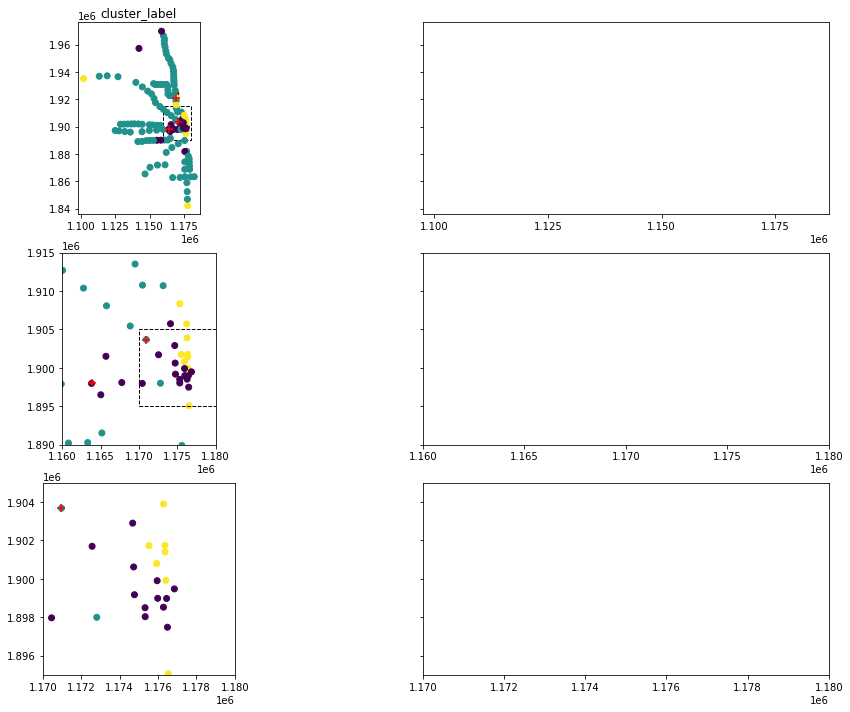

In [223]:
# Plotting clusters

rect1 = Rectangle((1160000,1890000), 20000, 25000, color='black', fc = 'none',lw = 2)
rect2 = Rectangle((1170000,1895000), 10000, 10000, color='black',fc = 'none', lw = 2)

fig, ax = plt.subplots(3, 2, figsize=(16,12), sharex='row', sharey='row')

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(3):
    for j in range(2):
        #ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
        
        # 'L train station rides:'
        if i==0 and j==0:
            ax[i,j].title.set_text('cluster_label')
            ax[i,j].add_patch(Rectangle((1160000,1890000), 20000, 25000, color='black', fc = 'none',lw = 1, ls='--'))
        
        if j==0:
            stations4.plot(ax=ax[i,j], column='cluster_label')
            special.plot(ax=ax[i,j], marker='+', color='red', markersize=50)
        
        # zoomed-in versions
        
        if i==1 and j==0:
            ax[i,j].set_ylim(1890000,1915000)
            ax[i,j].set_xlim(1160000,1180000)
            ax[i,j].add_patch(Rectangle((1170000,1895000), 10000, 10000, color='black',fc = 'none', lw = 1, ls='--'))
            
        if i==2 and j==0:
            ax[i,j].set_ylim(1895000,1905000)
            ax[i,j].set_xlim(1170000,1180000)
            
            

            
        # to include: title, and the contents of the plot itself
        
        # smaller version: ylim(1.89,1.91), xlim(1.16,1.18)
        
        
        #plt.xlabel('Time Steps')
        #plt.ylabel('x')
        

Text(0.5, 0, 'scaled_std')

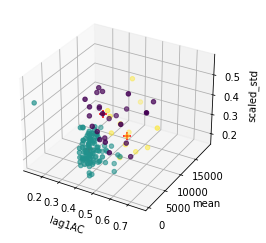

In [230]:
# plot clusters in 3d

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

ax.scatter3D(stations4['lag1AC'], stations4['mean'], stations4['scaled_std'], c=stations4['cluster_label'])
ax.scatter3D(special['lag1AC'], special['mean'], special['scaled_std'], marker='+', color='red', s=50, depthshade=False)


ax.set_xlabel('lag1AC')
ax.set_ylabel('mean')
ax.set_zlabel('scaled_std')

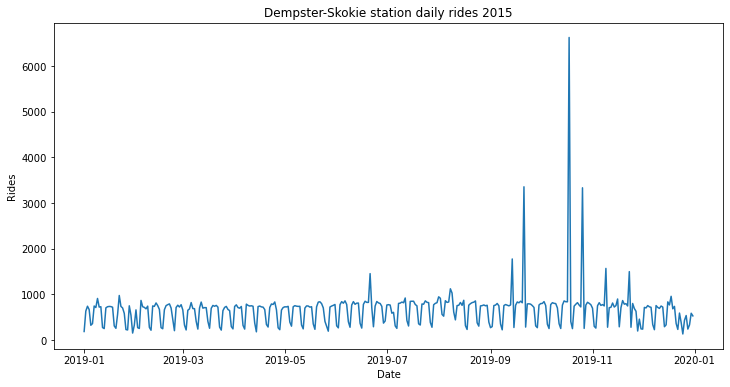

In [150]:
smaller = rides3.loc[41250,'rides']

plt.figure(figsize=(12,6))
plt.title('Dempster-Skokie station daily rides 2015')
plt.xlabel('Date')
plt.ylabel('Rides')
plt.plot(smaller['2019'])
plt.show()

Woohoo! We did computed summary statistics, did clustering, and made maps and plots. We identified 3 stations to further study.

In [231]:
station_id_study = [40810, 40490, 41320]

In [236]:
r = rides3.loc[station,'rides']
    
dataset = np.empty((1826,36))

In [238]:
dataset

array([[1.04817260e-311, 1.04736624e-311, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [240]:
for today in pd.date_range('2015-01-01','2015-01-05'):
    date35daysago = today - pd.offsets.Day(35)
    print(date35daysago)

2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00


In [242]:
dataset[0] = r['2014-11-27':'2015-01-01']

In [243]:
dataset[0]

array([ 3702.,  7006.,  7618.,  5950., 11452., 12375., 12728., 13006.,
       13609., 11184.,  7919., 12117., 12483., 12763., 12825., 13582.,
       11815.,  8490., 11919., 12281., 12096., 12291., 12414.,  9599.,
        7338., 10018.,  9225.,  5364.,  1977.,  5961.,  6159.,  5753.,
        9290.,  9683., 13906.,  7482.])

In [244]:
row = 0

for today in pd.date_range('2015-01-01','2019-12-31'):
    date35daysago = today - pd.offsets.Day(35)
    dataset[row] = rides[date35daysago:today]
    row += 1
    

In [245]:
dataset

array([[ 3702.,  7006.,  7618., ...,  9683., 13906.,  7482.],
       [ 7006.,  7618.,  5950., ..., 13906.,  7482.,  9710.],
       [ 7618.,  5950., 11452., ...,  7482.,  9710.,  7536.],
       ...,
       [ 6487., 11024., 10597., ...,  6416.,  5446.,  4936.],
       [11024., 10597.,  7883., ...,  5446.,  4936.,  7684.],
       [10597.,  7883.,  2675., ...,  4936.,  7684.,  7491.]])

In [249]:
datasets = []

# create five-week datasets

for station in station_id_study:
    
    rides = rides3.loc[station,'rides']
    
    dataset = np.empty((1826,36))

    row = 0
    
    for today in pd.date_range('2015-01-01','2019-12-31'):
        date35daysago = today - pd.offsets.Day(35)
        dataset[row] = rides[date35daysago:today]
        row += 1
    
    datasets.append(dataset)
    
    
# create two-week datasets 
# we'll do this by selecting certain columns from the five-week datasets

In [252]:
datasets[2]

array([[ 3702.,  7006.,  7618., ...,  9683., 13906.,  7482.],
       [ 7006.,  7618.,  5950., ..., 13906.,  7482.,  9710.],
       [ 7618.,  5950., 11452., ...,  7482.,  9710.,  7536.],
       ...,
       [ 6487., 11024., 10597., ...,  6416.,  5446.,  4936.],
       [11024., 10597.,  7883., ...,  5446.,  4936.,  7684.],
       [10597.,  7883.,  2675., ...,  4936.,  7684.,  7491.]])

### Test val train

In [424]:
from sklearn.metrics import mean_squared_error

def readout(model, X_train, y_train, X_val_or_test, y_val_or_test):

    training_preds = model.predict(X_train)
    print('Training set RMSE is', mean_squared_error(y_train, training_preds, squared=False))

    val_preds = model.predict(X_val_or_test)
    print('Val set RMSE is', mean_squared_error(y_val_or_test, val_preds, squared=False))
    
    if mean_squared_error(y_val_or_test, val_preds, squared=False) < 1:
        print('Woohoo! This is a pretty good model. Val set RMSE is < 1, at',
              mean_squared_error(y_val_or_test, test_preds, squared=False))

In [265]:
from sklearn.model_selection import train_test_split

Note: an advantage of AR is that we don't need training dataset - we only use the previous 35 days that are right in front of use to train a model for that particular instance.

Note: I am doing ARIMA wrong


## Illinois Medical District 35

Access using "datasets[0]"

In [372]:
# split into train/val/test
d = datasets[0]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,0:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [373]:
import statsmodels.api as sm

In [374]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 1059.3687576682216


In [375]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 1059.3687576682216


In [ ]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

#### Linear Regression

In [376]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 389.1962205408173
Val set RMSE is 528.8418968185434


#### Random Forest

In [377]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 130.94124214888234
Val set RMSE is 483.89268481985744


#### Extra Trees

In [378]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 485.8201177253736


#### Support Vector Regression

In [379]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 306.7513559114055
Val set RMSE is 508.752221562718


## Illinois Medical District 14

Access using "datasets[0]"

In [426]:
# split into train/val/test
d = datasets[0]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,21:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [381]:
import statsmodels.api as sm

In [382]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 1052.0165620630248


In [383]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 1052.0165620630248


In [ ]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

#### Linear Regression

In [384]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 442.46650325784327
Val set RMSE is 548.5839497517804


#### Random Forest

In [385]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 140.55511083874947
Val set RMSE is 499.0915297008937


#### Extra Trees

In [386]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 483.4483705383392


In [427]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_test,y_test)

Training set RMSE is 0.0
Val set RMSE is 394.2736381206537


#### Support Vector Regression

In [387]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 330.87048329553335
Val set RMSE is 507.00670652970075


## Grand 35

Access using "datasets[1]"

In [428]:
# split into train/val/test
d = datasets[1]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,0:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [389]:
import statsmodels.api as sm

In [390]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 700.6252339374947


In [391]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 700.6252339374947


In [392]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 2490.4498278836054


#### Linear Regression

In [393]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 283.6004012901398
Val set RMSE is 342.2137148974163


#### Random Forest

In [394]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 101.08778967724112
Val set RMSE is 300.23695014742964


#### Extra Trees

In [395]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 292.5037619777279


In [429]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_test,y_test)

Training set RMSE is 0.0
Val set RMSE is 271.74472839752934


#### Support Vector Regression

In [396]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 231.84681932467672
Val set RMSE is 322.3313686260472


## Grand 14

Access using "datasets[1]"

In [397]:
# split into train/val/test
d = datasets[1]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,21:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [398]:
import statsmodels.api as sm

In [399]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 697.5587984531576


In [400]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 697.5587984531576


In [ ]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

#### Linear Regression

In [401]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 321.672184778282
Val set RMSE is 364.1808345291169


#### Random Forest

In [402]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 106.08867330247585
Val set RMSE is 311.367843175353


#### Extra Trees

In [403]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 302.87343783227294


#### Support Vector Regression

In [404]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 245.86742368735182
Val set RMSE is 315.4030712823162


## Belmont 35

Access using "datasets[2]"

In [430]:
# split into train/val/test
d = datasets[2]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,0:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [406]:
import statsmodels.api as sm

In [407]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 2555.0496426788923


In [408]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 2555.0496426788923


In [ ]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

#### Linear Regression

In [409]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 1915.6878296031098
Val set RMSE is 1877.061647243793


#### Random Forest

In [410]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 656.8988201072503
Val set RMSE is 1775.6174970363902


#### Extra Trees

In [411]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 1733.9451201277755


In [431]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_test,y_test)

Training set RMSE is 0.0
Val set RMSE is 1259.330290460611


#### Support Vector Regression

In [412]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 1591.2428268661638
Val set RMSE is 1841.1173499888246


## Belmont 14

Access using "datasets[2]"

In [413]:
# split into train/val/test
d = datasets[2]

X_train, X_purg, y_train, y_purg = train_test_split(d[:,21:35],
                                                    d[:,-1],
                                                    test_size=0.4,
                                                    random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_purg,
                                                    y_purg,
                                                    test_size=0.5,
                                                    random_state=19)

#### ARIMA

In [414]:
import statsmodels.api as sm

In [415]:
mean_pred = [np.mean(X_val[i]) for i in range(365)]

print('Val set RMSE is', mean_squared_error(y_val, mean_pred, squared=False))

Val set RMSE is 2518.338112865881


In [416]:
preds = []

for row in range(len(y_val)):
    mean = np.mean(X_val[row])
    mod02 = sm.tsa.statespace.SARIMAX(X_val[row]-mean, order=(1,0,0), seasonal_order=(1,0,0,7))
    fit02 = mod02.fit(disp=False)
    pred = fit02.predict(0,0) + mean
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

Val set RMSE is 2518.338112865881


In [ ]:
preds = []

for row in range(len(y_val)):
    mod02 = sm.tsa.arima.ARIMA(X_val[row], order=(7,1,0), seasonal_order=(0,0,0,0))
    fit02 = mod02.fit()
    pred = fit02.predict(0,0)
    preds.append(pred)

print('Val set RMSE is', mean_squared_error(y_val, preds, squared=False))

#### Linear Regression

In [417]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01,X_train,y_train,X_val,y_val)

Training set RMSE is 2009.4931694241072
Val set RMSE is 2019.9477281943402


#### Random Forest

In [418]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

forest01 = RandomForestRegressor(n_estimators=500,random_state=19)
forest01.fit(X_train, y_train)

readout(forest01,X_train,y_train,X_val,y_val)

Training set RMSE is 679.6699941040579
Val set RMSE is 1740.3048506228386


#### Extra Trees

In [419]:
from sklearn.ensemble import ExtraTreesRegressor

forest07 = ExtraTreesRegressor(n_estimators=500,random_state=19)
forest07.fit(X_train, y_train)

readout(forest07,X_train,y_train,X_val,y_val)

Training set RMSE is 0.0
Val set RMSE is 1800.6836640799593


#### Support Vector Regression

In [420]:
from sklearn.svm import SVR

std = np.std(X_train)
svr01 = SVR(C=std, epsilon=0.2*std)
svr01.fit(X_train, y_train)

readout(svr01,X_train,y_train,X_val,y_val)

Training set RMSE is 1655.9356025985064
Val set RMSE is 1822.287706700651


county_geo <- readRDS("data/county_geo.rds")

homework_df <- readRDS("data/homework_df.rds")

missing <- homework_df %>%
  dplyr::filter(is.na(zhvi))

In [ ]:
from sklearn.model_selection import train_test_split

nonmissing = nonmissing.dropna()

X_train, X_val, y_train, y_val = train_test_split(nonmissing.drop('zhvi',axis=1),
                                                  nonmissing['zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

In [ ]:
y_train

In [ ]:
from sklearn.metrics import mean_squared_error

def readout(model):

    training_preds = model.predict(X_train)
    print('Training set RMSE is', mean_squared_error(y_train, training_preds, squared=False))

    val_preds = model.predict(X_val)
    print('Val set RMSE is', mean_squared_error(y_val, val_preds, squared=False))
    
    if mean_squared_error(y_val, val_preds, squared=False) < 1:
        print('Woohoo! This is a pretty good model. Val set RMSE is < 1, at',
              mean_squared_error(y_val, test_preds, squared=False))

### Linear Regression

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(nonmissing.loc[:,['county_geoid', 'year','median_income', 'lon', 'lat','row_id']],
                                                  nonmissing.loc[:,'zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

In [ ]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

reg01 = LinearRegression()
reg01.fit(X_train, y_train)

readout(reg01)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(nonmissing.loc[:,['county_geoid', 'year','median_income', 'lon', 'lat','row_id']],
                                                  nonmissing.loc[:,'zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(nonmissing.loc[:,['year','median_income', 'lon', 'lat']],
                                                  nonmissing.loc[:,'zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

reg02 = LinearRegression()
reg02.fit(X_train, y_train)

readout(reg02)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(nonmissing.loc[:,['year','median_income']],
                                                  nonmissing.loc[:,'zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

reg03 = LinearRegression()
reg03.fit(X_train, y_train)

readout(reg03)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
forest01 = RandomForestRegressor(random_state=666)
forest01.fit(X_train, y_train)

readout(forest01)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(nonmissing.loc[:,['year','median_income', 'lon', 'lat']],
                                                  nonmissing.loc[:,'zhvi'],
                                                    test_size=0.3,
                                                    random_state=666)

forest02 = RandomForestRegressor(n_estimators=500,random_state=666)
forest02.fit(X_train, y_train)

readout(forest02)

In [ ]:
forest03 = RandomForestRegressor(n_estimators=500,max_samples=0.25,random_state=666)
forest03.fit(X_train, y_train)

readout(forest03)

In [ ]:
forest03 = RandomForestRegressor(n_estimators=300,max_features='sqrt',random_state=666)
forest03.fit(X_train, y_train)

readout(forest03)

In [ ]:
forest05 = RandomForestRegressor(min_samples_split=4,random_state=666)
forest05.fit(X_train, y_train)

readout(forest05)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:

forest07 = ExtraTreesRegressor(n_estimators=200,random_state=666)
forest07.fit(X_train, y_train)

readout(forest07)

In [ ]:
forest08 = ExtraTreesRegressor(n_estimators=400,random_state=666)
forest08.fit(X_train, y_train)

readout(forest08)

### SGD Regressor

from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pip01 = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge(alpha=10))
])

pip01.fit(X_train, y_train)

readout(pip01)

### THe ExtraTrees - forest08 - was the winner!

## Predict on the "missing" set and save as csv

In [ ]:
test_preds = forest08.predict(missing.drop('zhvi', axis=1))

In [ ]:
test_preds.shape

In [ ]:
missing.shape

In [ ]:
missing['yhat'] = test_preds

In [ ]:
missing.to_csv('Posch_August_Assignment5.csv')

In [ ]:
sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

# Instantiate a linear regression process
reg = LinearRegression()

# Fit the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = reg.predict(X_test)  # note: lr_pred means lr predictions on the test set

In [ ]:
from sklearn import metrics
from scipy import stats

# Performance Metrics

print('MSE: ', metrics.mean_squared_error(y_test, lr_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('R2: ', metrics.r2_score(y_test, lr_pred))
print('Correlation: ', stats.pearsonr(y_test, lr_pred)[0])

# Plotting prediction vs ground truth

plt.figure(figsize=(12,4))
plt.plot(y_test, label='Truth', c='blue')
plt.plot(lr_pred, label='Prediction', linestyle='dotted', c='red')
plt.ylabel('x', fontsize=12)
plt.xlabel('Time Steps t since 4490', fontsize=12)
plt.title('Figure 2.1A: Linear Regressor predictions were extremely good')
plt.legend(fontsize=12)
plt.show()

Crazy idea: train Naive Bayes for lots of different versions of the problem ( A) is it <10K or >10K?  B) is it <15K or >15K? .. etc say for 30 different values). The collection of 30 yes/no outputs forms a pseudo- probability distribution which we can use to make the best prediction.

#### I will focus on RMSE

rmse <- function(y, yhat){
  sqrt(mean((yhat-y)^2))
}

r2 <- function(y, yhat){
  sse <-sum((yhat-y)^2)
  sst <-sum((y-mean(y))^2)
  1 - sse/sst
}

bias <- function(y, yhat){
  mean((yhat-y))
}

tail_bias <- function(y, yhat){
  quantile(yhat, 0.99) - quantile(y, 0.99)
}

mape <- function(y, yhat){
  100*mean((yhat-y) / y)
}